In [1]:
import csv
import pandas as pd
import geopandas as gpd
import shapely
from shapely.geometry import Point, Polygon

In [2]:
df = pd.read_csv('NYC Development Data.csv')

df.head()

,the_geom,cost_estimate,the_geom_webmercator,latitude,longitude,borough,job_type,permit_type,job_number,bin_number,...,square_footage,permit_issuance_date,permit_expiration_date,job_location_house_number,job_location_street_name,community_board,applicant_business_name,proposed_occupancy_class,proposed_stories,proposed_dwelling_units
0,0101000020E610000000000080938652C0000000002348...,225000,0101000020110F0000385E802CBE775FC1EEE173E834E0...,40.563568,-74.102753,Staten Island,A1,ALT 1 Enlargement,520166882,5056524,...,1223,12/11/19,9/4/20 12:00,79,MARINE WAY,502.0,EUROREMONT INC,RESIDENTIAL: 1 & 2 FAMILY HOUSES,2,2.0
1,0101000020E610000000000080627F52C0000000009349...,8643792,0101000020110F000051D1D10C876B5FC180A26D5AD0E1...,40.574799,-73.990387,Brooklyn,NB,New Building,321189628,3321839,...,58404,3/26/19,3/25/20 12:00,2920,WEST 23RD STREET,313.0,"DOBCO, INC",ASSEMBLY: OTHER,3,NaN
2,0101000020E6100000000000C0337F52C0000000C00F4B...,1191252,0101000020110F00007F9FF7A3376B5FC10ED55A207AE3...,40.586418,-73.987534,Brooklyn,NB,New Building,321826743,3187367,...,8049,9/11/19,3/30/20 12:00,168,BAY 49 STREET,313.0,OZ BOSPH CONSTRUCTION COR,RESIDENTIAL: APARTMENT HOUSES,4,8.0
3,0101000020E610000000000020C67F52C000000040374D...,885000,0101000020110F00008116EE45306C5FC113DABFF8E2E5...,40.603249,-73.996468,Brooklyn,A1,ALT 1 Enlargement,321188521,3166975,...,0,1/3/20,12/1/20 12:00,2076,86TH STREET,311.0,TOM RECTENWALD CONSTRUCTI,BUSINESS,2,NaN
4,0101000020E6100000000000E0177B52C0000000405051...,2479000,0101000020110F0000B03ECAEC3C645FC18C275EB178EA...,40.635262,-73.923332,Brooklyn,A1,ALT 1 Enlargement,321818994,3213825,...,11178,12/4/19,7/12/20 12:00,5520,GLENWOOD ROAD,318.0,GUB MAINTENANCE INC,EDUCATIONAL,1,0.0


In [3]:
df['permit_type'] == 'New Building'

0       False
1        True
2        True
3       False
4       False
        ...  
6909     True
6910    False
6911     True
6912     True
6913     True
Name: permit_type, Length: 6914, dtype: bool

In [4]:
df[df['permit_type'] == 'New Building']

,the_geom,cost_estimate,the_geom_webmercator,latitude,longitude,borough,job_type,permit_type,job_number,bin_number,...,square_footage,permit_issuance_date,permit_expiration_date,job_location_house_number,job_location_street_name,community_board,applicant_business_name,proposed_occupancy_class,proposed_stories,proposed_dwelling_units
1,0101000020E610000000000080627F52C0000000009349...,8643792,0101000020110F000051D1D10C876B5FC180A26D5AD0E1...,40.574799,-73.990387,Brooklyn,NB,New Building,321189628,3321839,...,58404,3/26/19,3/25/20 12:00,2920,WEST 23RD STREET,313.0,"DOBCO, INC",ASSEMBLY: OTHER,3,NaN
2,0101000020E6100000000000C0337F52C0000000C00F4B...,1191252,0101000020110F00007F9FF7A3376B5FC10ED55A207AE3...,40.586418,-73.987534,Brooklyn,NB,New Building,321826743,3187367,...,8049,9/11/19,3/30/20 12:00,168,BAY 49 STREET,313.0,OZ BOSPH CONSTRUCTION COR,RESIDENTIAL: APARTMENT HOUSES,4,8.0
5,0101000020E6100000000000C07B8A52C000000040FD51...,2348760,0101000020110F0000B508F932617E5FC19AD6D6503AEB...,40.640541,-74.163803,Staten Island,NB,New Building,520141613,5162141,...,15870,10/8/19,9/30/20 12:00,3161,RICHMOND TERRACE,501.0,RAFFO CONSTRUCTION CORP,BUSINESS,4,NaN
6,0101000020E610000000000020437C52C0000000E01758...,1608020,0101000020110F000060DD2F3B39665FC118E980E90FF2...,40.688229,-73.941597,Brooklyn,NB,New Building,321188709,3426446,...,10865,10/29/19,5/9/20 12:00,459,QUINCY STREET,303.0,NYB BUILDERS INC,RESIDENTIAL: APARTMENT HOUSES,4,10.0
7,0101000020E6100000000000408C7252C000000040AE59...,562104,0101000020110F0000C0321506B9555FC125E4A61DD7F3...,40.700630,-73.789810,Queens,NB,New Building,421566807,4216421,...,3798,12/23/19,4/18/20 12:00,104-32,MERRICK BLVD,412.0,HIGH DENSITY INC,MERCANTILE,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6908,0101000020E6100000000000203F7652C000000000FE73...,273800,0101000020110F00000A0BE062015C5FC17DAEE8985C11...,40.906189,-73.847603,Bronx,NB,New Building,220467901,2119404,...,1850,9/13/19,6/20/20 12:00,737,EAST 243RD STREET,212.0,P & P CONSTR & PAINTING,RESIDENTIAL: 1 & 2 FAMILY HOUSES,3,2.0
6909,0101000020E6100000000000E09B7952C0000000001674...,600140,0101000020110F000051BEEB74B7615FC1E2732E917711...,40.906921,-73.900139,Bronx,NB,New Building,220633456,2128370,...,4055,8/20/19,4/4/20 12:00,335,WEST 259 STREET,208.0,ABSOLUTE MASONRY INC,RESIDENTIAL: 1 & 2 FAMILY HOUSES,2,2.0
6911,0101000020E6100000000000207E7952C0000000E06674...,424316,0101000020110F00006FE460EC84615FC1755FB473D211...,40.909390,-73.898323,Bronx,NB,New Building,220587577,2085360,...,2867,9/17/19,6/1/20 12:00,268,WEST 261ST STREET,208.0,KEY CONSTRUCTION PARTNER,RESIDENTIAL: 1 & 2 FAMILY HOUSES,3,2.0
6912,0101000020E6100000000000207E7952C0000000E06674...,29600,0101000020110F00006FE460EC84615FC1755FB473D211...,40.909390,-73.898323,Bronx,NB,New Building,220664831,2085360,...,200,10/22/19,10/10/20 12:00,268,WEST 261ST STREET,208.0,KEY CONSTRUCTION PARTNER,UTILITY / MISCELLANEOUS,1,2.0


In [5]:
df_new_building = df[df['permit_type'] == 'New Building']

In [6]:
df_new_building = gpd.GeoDataFrame(df_new_building, 
                               geometry=gpd.points_from_xy(df_new_building.longitude, df_new_building.latitude),
                              crs={'init': 'epsg:4326'})

# See now we have a 'geometry' column?
print (type(df_new_building))
df_new_building.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,the_geom,cost_estimate,the_geom_webmercator,latitude,longitude,borough,job_type,permit_type,job_number,bin_number,...,permit_issuance_date,permit_expiration_date,job_location_house_number,job_location_street_name,community_board,applicant_business_name,proposed_occupancy_class,proposed_stories,proposed_dwelling_units,geometry
1,0101000020E610000000000080627F52C0000000009349...,8643792,0101000020110F000051D1D10C876B5FC180A26D5AD0E1...,40.574799,-73.990387,Brooklyn,NB,New Building,321189628,3321839,...,3/26/19,3/25/20 12:00,2920,WEST 23RD STREET,313.0,"DOBCO, INC",ASSEMBLY: OTHER,3,NaN,POINT (-73.99039 40.57480)
2,0101000020E6100000000000C0337F52C0000000C00F4B...,1191252,0101000020110F00007F9FF7A3376B5FC10ED55A207AE3...,40.586418,-73.987534,Brooklyn,NB,New Building,321826743,3187367,...,9/11/19,3/30/20 12:00,168,BAY 49 STREET,313.0,OZ BOSPH CONSTRUCTION COR,RESIDENTIAL: APARTMENT HOUSES,4,8.0,POINT (-73.98753 40.58642)
5,0101000020E6100000000000C07B8A52C000000040FD51...,2348760,0101000020110F0000B508F932617E5FC19AD6D6503AEB...,40.640541,-74.163803,Staten Island,NB,New Building,520141613,5162141,...,10/8/19,9/30/20 12:00,3161,RICHMOND TERRACE,501.0,RAFFO CONSTRUCTION CORP,BUSINESS,4,NaN,POINT (-74.16380 40.64054)
6,0101000020E610000000000020437C52C0000000E01758...,1608020,0101000020110F000060DD2F3B39665FC118E980E90FF2...,40.688229,-73.941597,Brooklyn,NB,New Building,321188709,3426446,...,10/29/19,5/9/20 12:00,459,QUINCY STREET,303.0,NYB BUILDERS INC,RESIDENTIAL: APARTMENT HOUSES,4,10.0,POINT (-73.94160 40.68823)
7,0101000020E6100000000000408C7252C000000040AE59...,562104,0101000020110F0000C0321506B9555FC125E4A61DD7F3...,40.700630,-73.789810,Queens,NB,New Building,421566807,4216421,...,12/23/19,4/18/20 12:00,104-32,MERRICK BLVD,412.0,HIGH DENSITY INC,MERCANTILE,1,NaN,POINT (-73.78981 40.70063)


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline\

neighbor = gpd.read_file("geo_export_9c251219-4443-4ade-b6c2-8890afbd6143.shp")
print (neighbor.crs)

stations = gpd.read_file("geo_export_c84ab1a4-ce29-4912-a3c8-8b4be508a404.shp")
print (stations.crs)

df_new_building = df_new_building.to_crs(neighbor.crs)
print(df_new_building.crs)


{'init': 'epsg:4326'}
{'init': 'epsg:4326'}
{'init': 'epsg:4326'}


<Figure size 432x288 with 0 Axes>

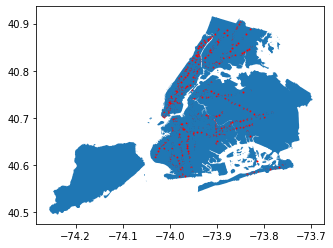

In [8]:
plt.figure()
ax = neighbor.plot()
stations.plot(ax=ax, markersize=1, color='red')
df_new_building.plot(ax=ax, markersize=1)
plt.show()


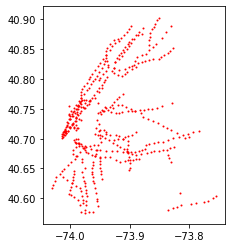

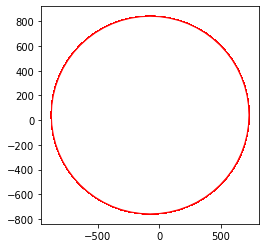

In [9]:

stations.plot(markersize=1, color='red')

stations.loc[:, 'geometry'] = stations.geometry.buffer(distance=800)
stations.plot(facecolor='white',edgecolor='red')